# Question Five:
Which are the Top 5 countries that have shown the best Sales CAGR?
The Strategy team feels that if we remove the Bottom 10 Percentile transactions -it will change the
Top 5 countries ranking.
Validate this. 

### Import the relevant libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sw
import seaborn as sns
import datetime
sns.set()

### A glance at the dataset:

In [2]:
data=pd.read_csv('Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           51290 non-null  object 
 1   City               51290 non-null  object 
 2   Country            51290 non-null  object 
 3   Customer ID        51290 non-null  object 
 4   Customer Name      51290 non-null  object 
 5   Market             51290 non-null  object 
 6   Order Date         51290 non-null  object 
 7   Order ID           51290 non-null  object 
 8   Order Priority     51290 non-null  object 
 9   Product ID         51290 non-null  object 
 10  Product Name       51290 non-null  object 
 11  Region             51290 non-null  object 
 12  Row ID             51290 non-null  int64  
 13  Segment            51290 non-null  object 
 14  Ship Date          51290 non-null  object 
 15  Ship Mode          51290 non-null  object 
 16  State              512

In [3]:
data.head()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost
0,Office Supplies,Budapest,Hungary,AT-7352,Annie Thurman,EMEA,01-01-2011,HU-2011-1220,High,OFF-TEN-10001585,...,05-01-2011,Second Class,Budapest,Storage,0.0,1,29.640,4,66,8.17
1,Office Supplies,Stockholm,Sweden,EM-141402,Eugene Moren,EU,01-01-2011,IT-2011-3647632,High,OFF-PA-10001492,...,05-01-2011,Second Class,Stockholm,Paper,0.5,1,-26.055,3,45,4.82
2,Office Supplies,Constantine,Algeria,TB-112801,Toby Braunhardt,Africa,01-01-2011,AG-2011-2040,Medium,OFF-TEN-10000025,...,06-01-2011,Standard Class,Constantine,Storage,0.0,1,106.140,2,408,35.46
3,Furniture,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,01-01-2011,IN-2011-47883,Medium,FUR-FU-10003447,...,08-01-2011,Standard Class,New South Wales,Furnishings,0.1,1,37.770,5,114,4.70
4,Office Supplies,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,01-01-2011,IN-2011-47883,Medium,OFF-PA-10001968,...,08-01-2011,Standard Class,New South Wales,Paper,0.1,1,15.342,2,55,1.80


### Procedure:

In [10]:
cagr_data=pd.concat([data['Country'],data['Sales'],data['Order Date']],axis=1)
cagr_data['Order Date']= pd.to_datetime(cagr_data['Order Date'])
cagr_data['Sales']= cagr_data['Sales'].apply(lambda x: int(x.replace(',','')))

Each instance is grouped according to the order date (2011:1,2012:2,2013:3,2014:4)

In [11]:
def group_to_year(x):
    year=x.year
    quarter_dict={2011:1,2012:2,2013:3,2014:4}
    return quarter_dict[year]

In [12]:
cagr_data['Year']=cagr_data['Order Date'].apply(group_to_year)
cagr_data.head()

,Country,Sales,Order Date,Year
0,Hungary,66,2011-01-01,1
1,Sweden,45,2011-01-01,1
2,Algeria,408,2011-01-01,1
3,Australia,114,2011-01-01,1
4,Australia,55,2011-01-01,1


### Calculation of CAGR:

In [13]:
countries=list(cagr_data['Country'].unique())
cagr=list()
for country in countries:
    sales=list()
    for year in range(1,5):
        sale=sum(cagr_data[cagr_data['Country']==country][cagr_data['Year']==year]['Sales'])
        if sale!=0:
            sales.append((sale,year))
    if len(sales)==1:
        if sales[0][1]!=4:
            cagr.append(-100.)
        else:
            cagr.append(0)
    else:
        cagr.append((((sales[-1][0]/sales[0][0])**(1/(sales[-1][1]-sales[0][1])))-1)*100)

c:\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Top 5 countries with the highest CAGR:

In [14]:
cagr_of_countries=pd.DataFrame(data={'Country':countries,'CAGR':cagr})
cagr_of_countries.sort_values("CAGR", axis = 0, ascending = False, inplace = True) 
cagr_of_countries.head()

,Country,CAGR
138,Mauritania,1110.493336
145,Slovenia,760.130719
123,Uruguay,412.743486
103,Croatia,356.546283
110,Tajikistan,330.287651


### Histogram of the raw sales data:

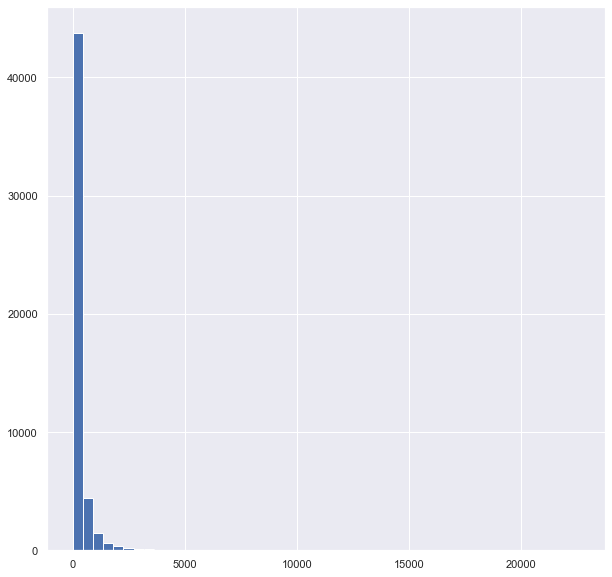

In [15]:
cagr_data['Sales'].hist(bins=50,figsize=(10,10))

### Removing the bottom 10 percentile transactions:

In [16]:
z=cagr_data['Sales'].quantile(0.1)
mod_cagr_data=cagr_data[cagr_data['Sales']>z]

### Histogram of the new sales data:

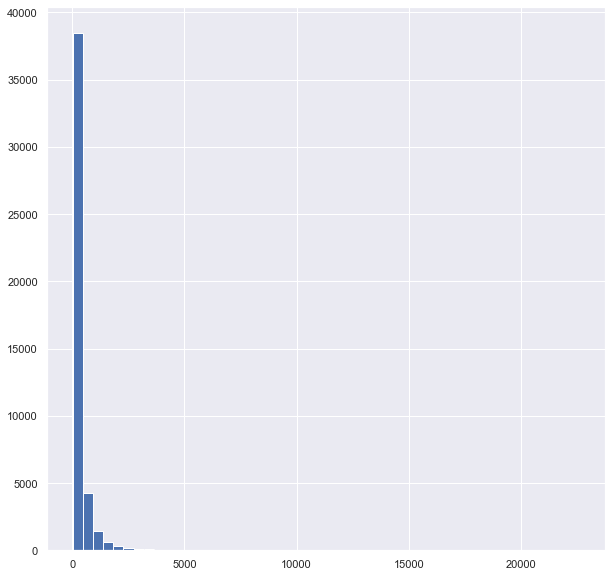

In [17]:
mod_cagr_data['Sales'].hist(bins=50,figsize=(10,10))

### Calculation of CAGR with new sales data:

In [18]:
mod_countries=list(mod_cagr_data['Country'].unique())
mod_cagr=list()
for country in mod_countries:
    sales=list()
    for year in range(1,5):
        sale=sum(mod_cagr_data[mod_cagr_data['Country']==country][mod_cagr_data['Year']==year]['Sales'])
        if sale!=0:
            sales.append((sale,year))
    if len(sales)==1:
        if sales[0][1]!=4:
            mod_cagr.append(-100.)
        else:
            mod_cagr.append(0)
    else:
        mod_cagr.append((((sales[-1][0]/sales[0][0])**(1/(sales[-1][1]-sales[0][1])))-1)*100)

c:\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Top 5 countries with the highest CAGR:

In [19]:
mod_cagr_of_countries=pd.DataFrame(data={'Country':mod_countries,'CAGR':mod_cagr})
mod_cagr_of_countries.sort_values("CAGR", axis = 0, ascending = False, inplace = True) 
mod_cagr_of_countries.head()

,Country,CAGR
136,Mauritania,1104.403685
144,Slovenia,760.130719
122,Uruguay,412.743486
102,Croatia,353.714117
98,Burundi,325.490196


### Conclusion:

Even after removing the bottom ten percentile transactions from the original data, the top 5 countries ranking does not change much